In [2]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
import seaborn as sns

# Linear regression for prediction

For the remainder of the course we will look at using linear regression in a more algorithmic/computer science/machine learning context. In this notebook we will take a more detailed look at conducting linear regression in `scikit-learn`, you will:
* write your own code to compute MSE
* Learn what training and testing sets are
* Use `scikit-learn` to perform a multiple linear regression
* Evaluate your results
* Create a model to predict housing prices


## Assesing model accuracy

We always must evaluate how 'good' our model is in order to understand how it performs. One common meaure of accuracy (or error) for a regression type problem is **Mean Squared Error (MSE)**. This can be calculated using the following formula:

<div style="font-size: 120%;">  
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
</div>

where $y_i$ is the true values and $\hat{f}(x_i)$ is the predicted values by our model over $n$ samples.

### Excercise 1: write a function to calculate MSE

Given the lists of true values and predictions write a function that calculates the MSE of this data. 


<details><summary>HINT</summary><br>
using numpy arrays will make this much easier.
</details>

In [3]:
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]

In [4]:
### your solution here
true_values=np.asarray(true_values)
predicted_vals=np.asarray(predicted_vals)
def MSE(true_values,predicted_valuess):
    return ((true_values-predicted_vals)**2).sum()/len(true_values)
    
MSE(true_values,predicted_vals)

0.7720000000000011

### MSE evaluation in sklearn

`Scikit-Learn` provides a function to calculate MSE (as well as other useful performance metrics) so that you dont have to carry around your function to all the different projects you work on. We can use this to evaluate our function and check that we got the correct answer in the excercise above.

In [4]:
import sklearn.metrics as metrics

metrics.mean_squared_error(true_values, predicted_vals)

0.7720000000000011

**Task 1**: Other evaluation metrics
* Find at least 2 other metrics that exist in `Scikit-Learn` that can be used in regression problems.
* Calculate the errors of these on the hypothetical data we used above.

In [5]:
#### your solution here
print("R squared score is :",metrics.r2_score(true_values,predicted_vals))
print("Explained variance scored is :",metrics.explained_variance_score(true_values,predicted_vals))
print("Max error is :",metrics.max_error(true_values,predicted_vals))
print("Mean absolute error is :",metrics.mean_absolute_error(true_values,predicted_vals))

R squared score is : 0.9814576407970332
Explained variance scored is : 0.9814960705570394
Max error is : 1.4000000000000021
Mean absolute error is : 0.6800000000000004


## Training and testing sets

When building models for prediction we are most interested in building a model that will generalise well to new sets of data that we will encounter in the future. Strictly speaking what we have calculated above is a *training MSE*, which means that the calculation of MSE was performed on the same data samples the model was fitted to. 
 
One good way to asses whether our model will be useful on new data sets is to fit our model only to a subset of the data, and then use new data the model has not seen to produce a prediction which we can evaluate. We saw this process in the previous notebook when we introduced `scikit-learn` and Logistic Regression.

Here is another example:

In [6]:
from sklearn.datasets import load_diabetes
diabs = load_diabetes()

In [7]:
print(diabs.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [8]:
diabs.data.shape

(442, 10)

In [9]:
diabs.target.shape

(442,)

In [10]:
import pandas as pd

X = pd.DataFrame(diabs.data, columns=diabs.feature_names)#.assign(disease_progression = diabs.target)
y = diabs.target

In [11]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


We split the data into a test and training set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18)

Fitting a linear regression model.

In [13]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# predict y values for testing data set
y_pred_test = model.predict(X_test)

# evaluate MSE
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
print('test MSE: {0}'.format(mse_test))

test MSE: 3006.0733911079724


In [14]:
type(model)

sklearn.linear_model._base.LinearRegression

We can also use this model to predict values on the train set, and evaluate the MSE. Comparing the two MSE scores gives us information on whether the model is overfitting or not. Normally we would compare these scores with other types of models (for example *support vector machines* or *random forests*...) that we have built in order to understand which model is best for the particular problem we are trying to solve. We almost always expect the *training error* to be lower than the *test error* (i.e. our performance reduces (or MSE increases) slightly when we move to new data the model has not seen.

In [15]:
y_pred_train = model.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print('training MSE: {0}'.format(mse_train))

training MSE: 2864.886357101882


## Note: interpreting MSE

MSE is not particularly intuitive to help understand how well your model predicts. In order to interpret how well our model is doing we could convert MSE to something with similar units to the target variable by taking the square root. This would be **Root Mean Squared Error** or **RMSE**.

<br/>

<div style="font-size: 120%;">
$$ RMSE = \sqrt{MSE}$$
</div>

In [16]:
rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

RMSE: 54.82766994053251


If we do some simple descriptive stats on the target variable for the training set, we can see that our model is finding a solution on average within one standard deviation of the variance of the target. This type of analysis can give us some confidence whether our model is remotely useful or not!

In [17]:
mean  = np.mean(y_train)
std = np.std(y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

Mean (standard deviation) values of target variables in train set: 150.93655589123867 (76.63854952919398)


## Excercise 2: Linear regression prediction of house prices

The California housing market is booming and, as it is the home of silicon valley, the housing company **Homes4You** have decided they want to use new data science techniques to aid their business. They want you to build a predictive model that provides the median house price for each local area across the state (These local areas are often called *'blocks'*). They will use this to help guide their agents in how to price houses.

They have collected a data set which contains many features in order to aid your building of a model, but they wish to only include as few features as possible in order to reduce the time their agents spend collecting data in future.


Your mission is to apply a regression model to predict housing prices in California.
* Import the data the company has collected using the sklearn function `fetch_california_housing`
* Split the data into a training and testing set
* Build a linear regression model using all the variables available and print the train and test MSE scores.
* Try building other models with different combinations of variables. Print the train and test MSE scores of at least 2 of these models.
* Provide a recommendation to Homes4You of which variables you would include in the model.
* Print the train and test **RMSE** scores of your final model and explain in a few sentences to Homes4You how well your model is performing. 

In [51]:
#### your solution here

from sklearn.datasets import fetch_california_housing
California_housing=fetch_california_housing()
California_housing_X=pd.DataFrame(California_housing.data,columns=California_housing.feature_names)
California_housing_Y = California_housing.target
California_housing_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


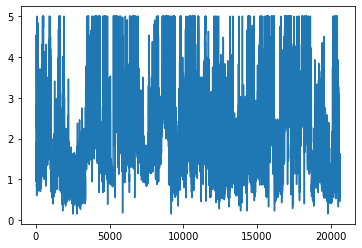

In [54]:
plt.plot(California_housing_Y)

In [19]:
print(California_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

**Task 2: Explain this to your neighbour...**
* The training and test errors are quite close. What does this mean? 

<details><summary>HINT</summary><br>
HINT: think in terms of if we were to apply this fitted model to new data the model has not seen.

</details>

* If your MSE & RMSE results are different to those of your peers (even when using the same features and model), why might this be? 

**Task 3:**
* Can you figure out how to load the 'boston house price' or the 'Linnerrud' data set that comes with sklearn? Try to build a model using one of these data sets.

Errors being close mean that our model is pretty good.<br>
I have same values that my neighbor, because the splitting of data is exactly yhe same (random state set to same value).<br>

In [22]:
print("All variables included.")
California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X, California_housing_Y, random_state = 18)

# fit model to training data
model = LinearRegression()
model.fit(California_housing_X_train, California_housing_Y_train)

# predict y values for testing data set
California_housing_Y_pred_test = model.predict(California_housing_X_test)

# evaluate MSE
mse_test = metrics.mean_squared_error(California_housing_Y_test, California_housing_Y_pred_test)
print('test MSE: {0}'.format(mse_test))

California_housing_Y_pred_train = model.predict(California_housing_X_train)
mse_train = metrics.mean_squared_error(California_housing_Y_train, California_housing_Y_pred_train)
print('training MSE: {0}'.format(mse_train))

rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

mean  = np.mean(California_housing_Y_train)
std = np.std(California_housing_Y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

All variables included.
test MSE: 0.5461989819549827
training MSE: 0.5191938764206628
RMSE: 0.739052759926504
Mean (standard deviation) values of target variables in train set: 2.075781606589147 (1.1592116195315114)


Best model (minimizing rmse) is:
[('MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude')]


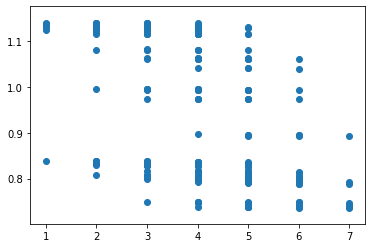

In [32]:
combinat=[]
for i in range(1,8):
    combinat.append([comb for comb in combinations(California_housing_X.columns, i)])

    labels = []
list_test_mse = []
list_train_mse = []
list_test_rmse = []
list_combi=[]
for combi in combinat:
    for i in combi:
        California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X[list(i)], California_housing_Y, random_state = 18)
        model.fit(California_housing_X_train, California_housing_Y_train)
        California_housing_Y_pred_test = model.predict(California_housing_X_test)
        mse_testh = metrics.mean_squared_error(California_housing_Y_test, California_housing_Y_pred_test)
        California_housing_Y_pred_train = model.predict(California_housing_X_train)
        mse_trainh = metrics.mean_squared_error(California_housing_Y_train, California_housing_Y_pred_train)
        rmse_testh = np.sqrt(mse_testh)
        labels.append(i)
        list_test_mse.append(mse_testh)
        list_train_mse.append(mse_trainh)
        list_test_rmse.append(rmse_testh)
        list_combi.append(len(i))

    
California_combi_test = pd.DataFrame(list(zip(labels, list_test_mse, list_train_mse, list_test_rmse, list_combi)), columns =['labels', 'test_mse', 'train_mse', 'test_rmse', 'combination'])
plt.scatter(California_combi_test.combination,California_combi_test['test_rmse'])
print("Best model (minimizing rmse) is:")
print(list(California_combi_test.loc[California_combi_test.test_rmse==California_combi_test['test_rmse'].min()]['labels'].values))

In [34]:
California_combi_test.loc[California_combi_test.test_rmse<California_combi_test['test_rmse'].min()+0.005]

,labels,test_mse,train_mse,test_rmse,combination
106,"(MedInc, HouseAge, Latitude, Longitude)",0.545367,0.539012,0.738490,4
171,"(MedInc, HouseAge, AveRooms, Latitude, Longitude)",0.543630,0.537608,0.737313,5
177,"(MedInc, HouseAge, AveBedrms, Latitude, Longit...",0.544814,0.531308,0.738115,5
180,"(MedInc, HouseAge, Population, Latitude, Longi...",0.545418,0.538877,0.738524,5
181,"(MedInc, HouseAge, AveOccup, Latitude, Longitude)",0.543926,0.537601,0.737513,5
223,"(MedInc, HouseAge, AveRooms, AveBedrms, Latitu...",0.547540,0.520817,0.739960,6
226,"(MedInc, HouseAge, AveRooms, Population, Latit...",0.543705,0.537533,0.737363,6
227,"(MedInc, HouseAge, AveRooms, AveOccup, Latitud...",0.542221,0.536252,0.736356,6
230,"(MedInc, HouseAge, AveBedrms, Population, Lati...",0.544834,0.531281,0.738129,6
231,"(MedInc, HouseAge, AveBedrms, AveOccup, Latitu...",0.543401,0.529950,0.737158,6


### Comparing distributions

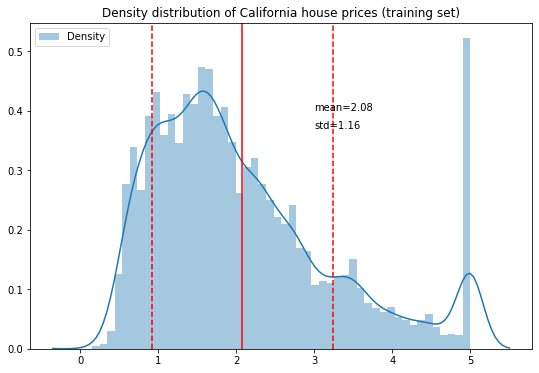

In [92]:
California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_Y, random_state = 18)


plt.figure(figsize=(9,6))
sns.distplot(California_housing_Y_train, hist=True, kde=True, bins=50,label='Density')
plt.legend()
plt.title('Density distribution of California house prices (training set)')
plt.text(3,0.4,"mean=%.2f"%California_housing_Y_train.mean())
plt.text(3,0.37,"std=%.2f"%California_housing_Y_train.std())
plt.axvline(x=California_housing_Y_train.mean(),c='r')
plt.axvline(x=California_housing_Y_train.mean()-California_housing_Y_train.std(),ls='dashed',c='r')
plt.axvline(x=California_housing_Y_train.mean()+California_housing_Y_train.std(),ls='dashed',c='r')
plt.show()

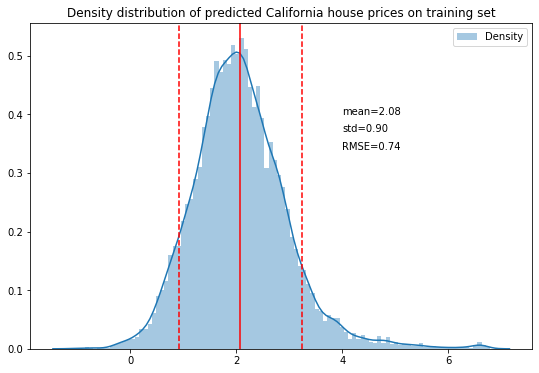

In [93]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X[best_model], California_housing_Y, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

rmse_trainh = np.sqrt(metrics.mean_squared_error(California_housing_Y_train, California_housing_Y_pred_train))
rmse_testh = np.sqrt(mse_testh)

plt.figure(figsize=(9,6))
sns.distplot(California_housing_Y_pred_train, hist=True, kde=True, bins=100,label='Density')
plt.legend()
plt.title('Density distribution of predicted California house prices on training set')
plt.text(4,0.4,"mean=%.2f"%California_housing_Y_pred_train.mean())
plt.text(4,0.38,"std=%.2f"%California_housing_Y_pred_train.std())
plt.text(4,0.36,"RMSE=%.2f"%rmse_testh)

plt.axvline(x=California_housing_Y_pred_train.mean(),c='r')
plt.axvline(x=California_housing_Y_pred_train.mean()-California_housing_Y_train.std(),ls='dashed',c='r')
plt.axvline(x=California_housing_Y_pred_train.mean()+California_housing_Y_train.std(),ls='dashed',c='r')

plt.show()

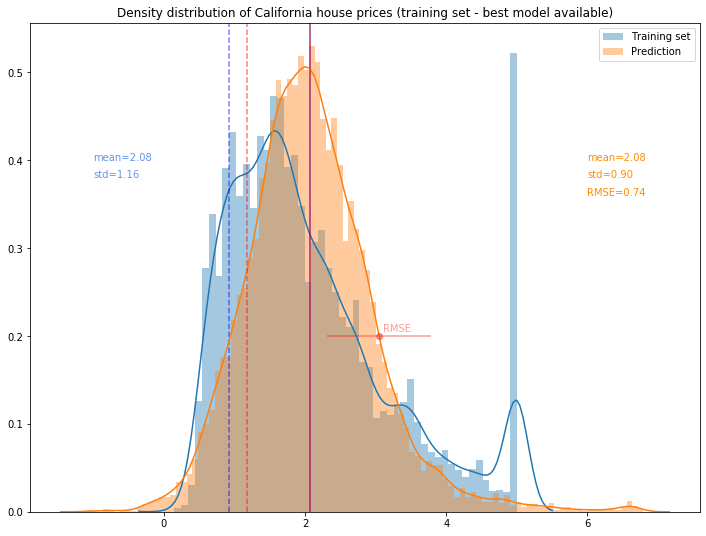

In [166]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X[best_model], California_housing_Y, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

plt.figure(figsize=(12,9))
sns.distplot(California_housing_Y_train, hist=True, kde=True, bins=50,label='Training set')
plt.title('Density distribution of California house prices (training set - best model available)')

plt.text(-1,0.4,"mean=%.2f"%California_housing_Y_train.mean(),c='cornflowerblue')
plt.text(-1,0.38,"std=%.2f"%California_housing_Y_train.std(),c='cornflowerblue')
plt.axvline(x=California_housing_Y_train.mean(),c='b',alpha=0.5)
plt.axvline(x=California_housing_Y_train.mean()-California_housing_Y_train.std(),ls='dashed',c='b',alpha=0.5)
# plt.axvline(x=California_housing_Y_train.mean()+California_housing_Y_train.std(),ls='dashed',c='b',alpha=0.5)


rmse_trainh = np.sqrt(metrics.mean_squared_error(California_housing_Y_train, California_housing_Y_pred_train))
rmse_testh = np.sqrt(mse_testh)

sns.distplot(California_housing_Y_pred_train, hist=True, kde=True, bins=100,label='Prediction')

plt.text(6,0.4,"mean=%.2f"%California_housing_Y_pred_train.mean(),c='darkorange')
plt.text(6,0.38,"std=%.2f"%California_housing_Y_pred_train.std(),c='darkorange')
plt.text(6,0.36,"RMSE=%.2f"%rmse_testh,c='darkorange')
plt.legend()

plt.axvline(x=California_housing_Y_pred_train.mean(),c='r',alpha=0.5)
plt.axvline(x=California_housing_Y_pred_train.mean()-California_housing_Y_pred_train.std(),ls='dashed',c='r',alpha=0.5)
# plt.axvline(x=California_housing_Y_pred_train.mean()+California_housing_Y_pred_train.std(),ls='dashed',c='r',alpha=0.5)

plt.errorbar(3.05, 0.2, xerr=[rmse_testh],fmt='o',c='r',alpha=0.4)
plt.text(3.1, 0.205, 'RMSE',c='r',alpha=0.4)

plt.show()

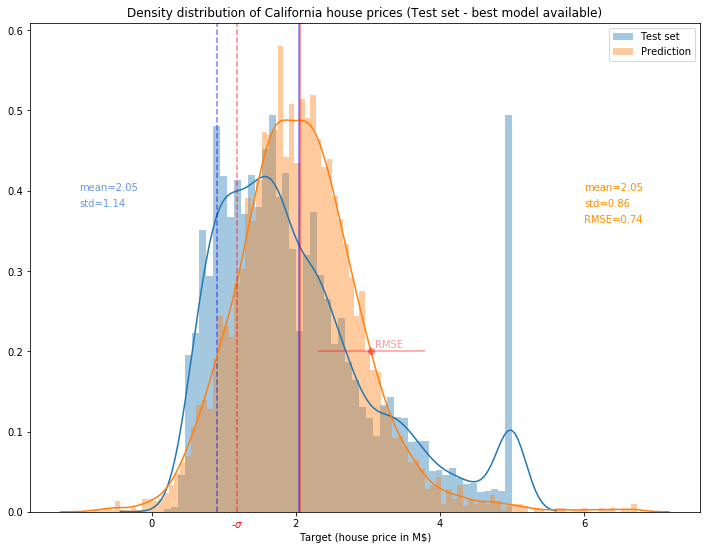

In [229]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X[best_model], California_housing_Y, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

plt.figure(figsize=(12,9))
sns.distplot(California_housing_Y_test, hist=True, kde=True, bins=50,label='Test set')
plt.title('Density distribution of California house prices (Test set - best model available)')

plt.text(-1,0.4,"mean=%.2f"%California_housing_Y_test.mean(),c='cornflowerblue')
plt.text(-1,0.38,"std=%.2f"%California_housing_Y_test.std(),c='cornflowerblue')
plt.axvline(x=California_housing_Y_test.mean(),c='b',alpha=0.5)
plt.axvline(x=California_housing_Y_test.mean()-California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)
# plt.axvline(x=California_housing_Y_test.mean()+California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)


rmse_testh = np.sqrt(metrics.mean_squared_error(California_housing_Y_test, California_housing_Y_pred_test))
rmse_testh = np.sqrt(mse_testh)

sns.distplot(California_housing_Y_pred_test, hist=True, kde=True, bins=100,label='Prediction')

plt.text(6,0.4,"mean=%.2f"%California_housing_Y_pred_test.mean(),c='darkorange')
plt.text(6,0.38,"std=%.2f"%California_housing_Y_pred_test.std(),c='darkorange')
plt.text(6,0.36,"RMSE=%.2f"%rmse_testh,c='darkorange')
plt.xlabel('Target (house price in M$)')
plt.legend()

plt.axvline(x=California_housing_Y_pred_test.mean(),c='r',alpha=0.5)
plt.axvline(x=California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)
plt.text(California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std()-0.09, -0.02, '-$\sigma$',c='r',alpha=1)
# plt.axvline(x=California_housing_Y_pred_test.mean()+California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)

plt.errorbar(3.05, 0.2, xerr=[rmse_testh],fmt='o',c='r',alpha=0.4)
plt.text(3.1, 0.205, 'RMSE',c='r',alpha=0.4)

plt.show()

### Removing outliers

In [212]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
California_housing_X['target']=California_housing_Y

upper_band=California_housing_Y.mean()+2*California_housing_Y.std()
lower_band=California_housing_Y.mean()-2*California_housing_Y.std()
California_housing_X_no=California_housing_X[~((California_housing_X.target<lower_band) | (California_housing_X.target>upper_band))]
California_housing_Y_no=California_housing_X_no.target

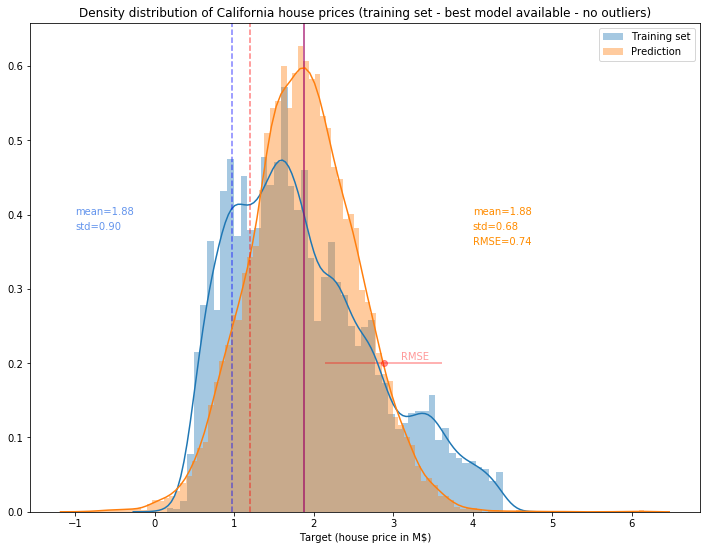

In [230]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X_no[best_model], California_housing_Y_no, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

plt.figure(figsize=(12,9))
sns.distplot(California_housing_Y_train, hist=True, kde=True, bins=50,label='Training set')
plt.title('Density distribution of California house prices (training set - best model available - no outliers)')

plt.text(-1,0.4,"mean=%.2f"%California_housing_Y_train.mean(),c='cornflowerblue')
plt.text(-1,0.38,"std=%.2f"%California_housing_Y_train.std(),c='cornflowerblue')
plt.axvline(x=California_housing_Y_train.mean(),c='b',alpha=0.5)
plt.axvline(x=California_housing_Y_train.mean()-California_housing_Y_train.std(),ls='dashed',c='b',alpha=0.5)
# plt.axvline(x=California_housing_Y_train.mean()+California_housing_Y_train.std(),ls='dashed',c='b',alpha=0.5)


rmse_trainh = np.sqrt(metrics.mean_squared_error(California_housing_Y_train, California_housing_Y_pred_train))
rmse_testh = np.sqrt(mse_testh)

sns.distplot(California_housing_Y_pred_train, hist=True, kde=True, bins=100,label='Prediction')

plt.text(4,0.4,"mean=%.2f"%California_housing_Y_pred_train.mean(),c='darkorange')
plt.text(4,0.38,"std=%.2f"%California_housing_Y_pred_train.std(),c='darkorange')
plt.text(4,0.36,"RMSE=%.2f"%rmse_testh,c='darkorange')
plt.xlabel('Target (house price in M$)')
plt.legend()

plt.axvline(x=California_housing_Y_pred_train.mean(),c='r',alpha=0.5)
plt.axvline(x=California_housing_Y_pred_train.mean()-California_housing_Y_pred_train.std(),ls='dashed',c='r',alpha=0.5)
# plt.axvline(x=California_housing_Y_pred_train.mean()+California_housing_Y_pred_train.std(),ls='dashed',c='r',alpha=0.5)

plt.errorbar(2.88, 0.2, xerr=[rmse_testh],fmt='o',c='r',alpha=0.4)
plt.text(3.1, 0.205, 'RMSE',c='r',alpha=0.4)

plt.show()

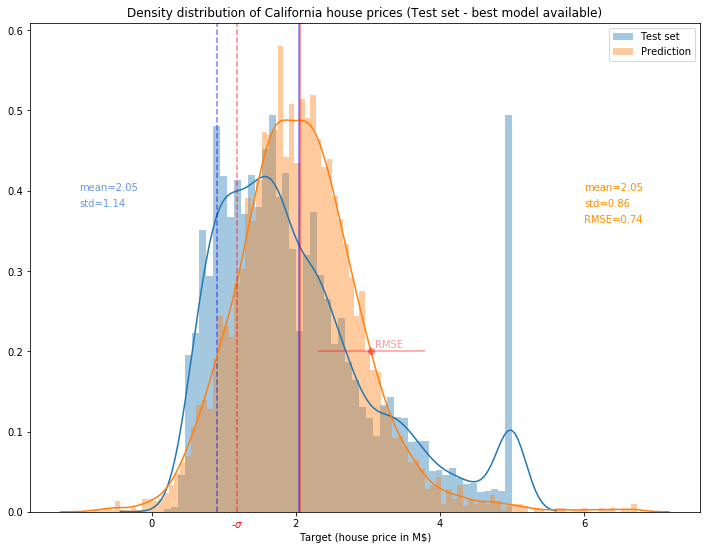

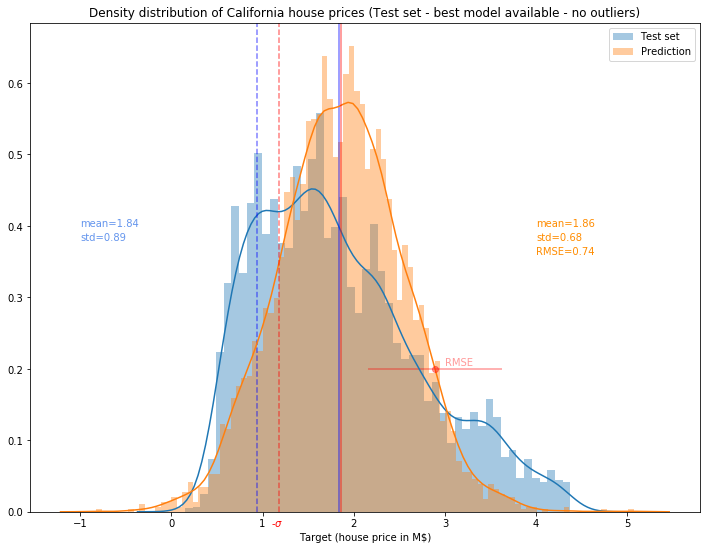

In [234]:
best_model=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X[best_model], California_housing_Y, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

plt.figure(figsize=(12,9))
sns.distplot(California_housing_Y_test, hist=True, kde=True, bins=50,label='Test set')
plt.title('Density distribution of California house prices (Test set - best model available)')

plt.text(-1,0.4,"mean=%.2f"%California_housing_Y_test.mean(),c='cornflowerblue')
plt.text(-1,0.38,"std=%.2f"%California_housing_Y_test.std(),c='cornflowerblue')
plt.axvline(x=California_housing_Y_test.mean(),c='b',alpha=0.5)
plt.axvline(x=California_housing_Y_test.mean()-California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)
# plt.axvline(x=California_housing_Y_test.mean()+California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)


rmse_testh = np.sqrt(metrics.mean_squared_error(California_housing_Y_test, California_housing_Y_pred_test))
rmse_testh = np.sqrt(mse_testh)

sns.distplot(California_housing_Y_pred_test, hist=True, kde=True, bins=100,label='Prediction')

plt.text(6,0.4,"mean=%.2f"%California_housing_Y_pred_test.mean(),c='darkorange')
plt.text(6,0.38,"std=%.2f"%California_housing_Y_pred_test.std(),c='darkorange')
plt.text(6,0.36,"RMSE=%.2f"%rmse_testh,c='darkorange')
plt.xlabel('Target (house price in M$)')
plt.legend()

plt.axvline(x=California_housing_Y_pred_test.mean(),c='r',alpha=0.5)
plt.axvline(x=California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)
plt.text(California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std()-0.09, -0.02, '-$\sigma$',c='r',alpha=1)
# plt.axvline(x=California_housing_Y_pred_test.mean()+California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)

plt.errorbar(3.05, 0.2, xerr=[rmse_testh],fmt='o',c='r',alpha=0.4)
plt.text(3.1, 0.205, 'RMSE',c='r',alpha=0.4)

plt.show()

#----------------------------------------------------------
#----------------------------------------------------------

California_housing_X_train, California_housing_X_test, California_housing_Y_train, California_housing_Y_test = train_test_split(California_housing_X_no[best_model], California_housing_Y_no, random_state = 18)
model.fit(California_housing_X_train, California_housing_Y_train)
California_housing_Y_pred_test = model.predict(California_housing_X_test)
California_housing_Y_pred_train = model.predict(California_housing_X_train)

plt.figure(figsize=(12,9))
sns.distplot(California_housing_Y_test, hist=True, kde=True, bins=50,label='Test set')
plt.title('Density distribution of California house prices (Test set - best model available - no outliers)')

plt.text(-1,0.4,"mean=%.2f"%California_housing_Y_test.mean(),c='cornflowerblue')
plt.text(-1,0.38,"std=%.2f"%California_housing_Y_test.std(),c='cornflowerblue')
plt.axvline(x=California_housing_Y_test.mean(),c='b',alpha=0.5)
plt.axvline(x=California_housing_Y_test.mean()-California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)
# plt.axvline(x=California_housing_Y_test.mean()+California_housing_Y_test.std(),ls='dashed',c='b',alpha=0.5)


rmse_testh = np.sqrt(metrics.mean_squared_error(California_housing_Y_test, California_housing_Y_pred_test))
rmse_testh = np.sqrt(mse_testh)

sns.distplot(California_housing_Y_pred_test, hist=True, kde=True, bins=100,label='Prediction')

plt.text(4,0.4,"mean=%.2f"%California_housing_Y_pred_test.mean(),c='darkorange')
plt.text(4,0.38,"std=%.2f"%California_housing_Y_pred_test.std(),c='darkorange')
plt.text(4,0.36,"RMSE=%.2f"%rmse_testh,c='darkorange')
plt.xlabel('Target (house price in M$)')
plt.legend()

plt.axvline(x=California_housing_Y_pred_test.mean(),c='r',alpha=0.5)
plt.axvline(x=California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)
plt.text(California_housing_Y_pred_test.mean()-California_housing_Y_pred_test.std()-0.09, -0.02, '-$\sigma$',c='r',alpha=1)
# plt.axvline(x=California_housing_Y_pred_test.mean()+California_housing_Y_pred_test.std(),ls='dashed',c='r',alpha=0.5)

plt.errorbar(2.89, 0.2, xerr=[rmse_testh],fmt='o',c='r',alpha=0.4)
plt.text(3, 0.205, 'RMSE',c='r',alpha=0.4)

plt.show()

## Boston

In [35]:
from sklearn.datasets import load_boston
Boston_housing=load_boston()
Boston_housing_X=pd.DataFrame(Boston_housing.data,columns=Boston_housing.feature_names)
Boston_housing_Y = Boston_housing.target
Boston_housing_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
print(Boston_housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Best model (minimizing rmse) is:
[('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')]


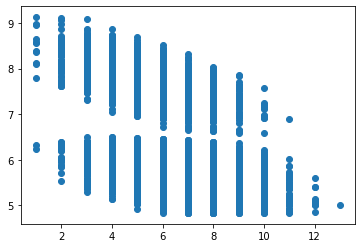

In [38]:
combinat=[]
for i in range(1,14):
    combinat.append([comb for comb in combinations(Boston_housing_X.columns, i)])

    labels = []
list_test_mse = []
list_train_mse = []
list_test_rmse = []
list_combi=[]
for combi in combinat:
    for i in combi:
        Boston_housing_X_train, Boston_housing_X_test, Boston_housing_Y_train, Boston_housing_Y_test = train_test_split(Boston_housing_X[list(i)], Boston_housing_Y, random_state = 18)
        model.fit(Boston_housing_X_train, Boston_housing_Y_train)
        Boston_housing_Y_pred_test = model.predict(Boston_housing_X_test)
        mse_testh = metrics.mean_squared_error(Boston_housing_Y_test, Boston_housing_Y_pred_test)
        Boston_housing_Y_pred_train = model.predict(Boston_housing_X_train)
        mse_trainh = metrics.mean_squared_error(Boston_housing_Y_train, Boston_housing_Y_pred_train)
        rmse_testh = np.sqrt(mse_testh)
        labels.append(i)
        list_test_mse.append(mse_testh)
        list_train_mse.append(mse_trainh)
        list_test_rmse.append(rmse_testh)
        list_combi.append(len(i))

    
Boston_combi_test = pd.DataFrame(list(zip(labels, list_test_mse, list_train_mse, list_test_rmse, list_combi)), columns =['labels', 'test_mse', 'train_mse', 'test_rmse', 'combination'])
plt.scatter(Boston_combi_test.combination,Boston_combi_test['test_rmse'])
print("Best model (minimizing rmse) is:")
print(list(Boston_combi_test.loc[Boston_combi_test.test_rmse==Boston_combi_test['test_rmse'].min()]['labels'].values))

In [41]:
Boston_combi_test.loc[Boston_combi_test.test_rmse<Boston_combi_test['test_rmse'].min()+0.005]

,labels,test_mse,train_mse,test_rmse,combination
4964,"(CRIM, NOX, RM, DIS, PTRATIO, B, LSTAT)",23.317108,24.253010,4.828779,7
6218,"(CRIM, ZN, NOX, RM, DIS, PTRATIO, B, LSTAT)",23.322236,23.668464,4.829310,8
6428,"(CRIM, INDUS, NOX, RM, DIS, PTRATIO, B, LSTAT)",23.291242,24.251700,4.826100,8
6576,"(CRIM, NOX, RM, AGE, DIS, PTRATIO, B, LSTAT)",23.313874,24.252999,4.828444,8
7253,"(CRIM, ZN, INDUS, NOX, RM, DIS, PTRATIO, B, LS...",23.298254,23.667496,4.826827,9
7521,"(CRIM, INDUS, NOX, RM, AGE, DIS, PTRATIO, B, L...",23.287817,24.251688,4.825745,9
7975,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,...",23.327732,22.283412,4.829879,10
8141,"(CRIM, ZN, INDUS, NOX, RM, DIS, RAD, TAX, PTRA...",23.317614,22.250167,4.828832,11


In [42]:
import statsmodels.api as sm

def perform_linear_regression(Y,X,display=True):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.
    
    Input
    =====
    Y, padnas series,
    X, padnas dataframe,
    
    Return
    ======
    results, statsmodel linear regression results object
    
    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    if display:
        print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
        print('R-squared: {0:1.3f}'.format(results.rsquared))
        print(results.summary().tables[1])
    return(results)


def backward_selection(Y,X,p_value_limit=0.05,display=False):
    '''Automated backward selection of variables. Returns a df without the variables. Does not modify the dataframes given in arguments.'''
    X_copy=X.copy()
    print("Original variables :")
    results_MLR = perform_linear_regression(Y, X_copy)
    n=0
    while max(results_MLR.pvalues.values)>p_value_limit:
        results_MLR = perform_linear_regression(Y, X_copy,display)
        variable_highest_pvalue=results_MLR.pvalues \
        [results_MLR.pvalues == max(results_MLR.pvalues.values)].index[0]
        if(max(results_MLR.pvalues.values))>0.05:
            print("Variable with the highest p-value, to be removed :",variable_highest_pvalue)
            del X_copy[variable_highest_pvalue]
            n+=1
    print("New MLR with removed variables :")
    perform_linear_regression(Y, X_copy)
    print("Number of variables that have been removed :",n)
    return X_copy
    

In [43]:
backward_selection(California_housing_Y,California_housing_X)

Original variables :
Adjusted R-squared: 0.606
R-squared: 0.606
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420


/home/campus-5/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Variable with the highest p-value, to be removed : Population
New MLR with removed variables :
Adjusted R-squared: 0.606
R-squared: 0.606
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
Number of variables that have been removed : 1


,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,2.123209,39.43,-121.32


In [44]:
California_housing_X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000
